<a href="https://colab.research.google.com/github/akashdas99/Bengali-Handwritten-Digit-Recognition/blob/main/Bengali_Handwritten_Digit_Recognition.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Importing libraries

In [ ]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from keras.utils import np_utils


Data Loading

In [ ]:
from google.colab import files

train=np.load('training-images.npz')
test=np.load('testing-images.npz')
print(train)

Data Preprocessing

In [ ]:
X_train=train['images'][:,:,:,0]
X_test=test['images'][:,:,:,0]
y_train=train['labels']
y_test=test['labels']

X_train = X_train.reshape(X_train.shape[0], 32, 32, 1)
X_test = X_test.reshape(X_test.shape[0], 32, 32, 1)

X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

X_train/=255
X_test/=255

print(X_train.shape)
print(X_test.shape)

(5000, 32, 32, 1)
(1000, 32, 32, 1)


9


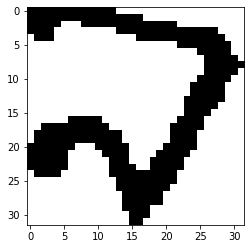

In [ ]:
plt.imshow(X_train[0][:,:,0],cmap="gray")
print(y_train[0])

In [ ]:
from sklearn.utils import shuffle
X_train, y_train = shuffle(X_train, y_train)

8


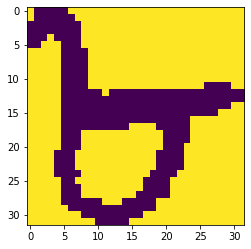

In [ ]:
plt.imshow(X_train[125][:,:,0])
print(y_train[125])

In [ ]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.optimizers import Adam
from keras.layers.normalization import BatchNormalization
from keras.layers import Conv2D, MaxPooling2D

model = Sequential()

model.add(Conv2D(32, (3, 3), input_shape=(32,32,1)))
model.add(Activation('relu'))
model.add(Conv2D(32, (3, 3)))
model.add(Activation('relu'))
BatchNormalization()
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(64, (6, 6)))
model.add(Activation('relu'))
model.add(Conv2D(64, (6, 6)))
model.add(Activation('relu'))
BatchNormalization()
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Flatten())
BatchNormalization()
model.add(Dense(128))
model.add(Activation('relu'))
model.add(Dropout(0.2))
model.add(Dense(10))
model.add(Activation('softmax'))

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 30, 30, 32)        320       
_________________________________________________________________
activation (Activation)      (None, 30, 30, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 28, 28, 32)        9248      
_________________________________________________________________
activation_1 (Activation)    (None, 28, 28, 32)        0         
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 9, 9, 64)          73792     
_________________________________________________________________
activation_2 (Activation)    (None, 9, 9, 64)          0

In [ ]:
model.compile(loss='sparse_categorical_crossentropy', optimizer=Adam(), metrics=['SparseCategoricalAccuracy'])

In [ ]:
history = model.fit(X_train,y_train,batch_size = 20, epochs=18,validation_data=(X_test,y_test))

Epoch 1/18
250/250 [==============================] - 20s 13ms/step - loss: 1.4043 - sparse_categorical_accuracy: 0.4879 - val_loss: 0.3278 - val_sparse_categorical_accuracy: 0.8830
Epoch 2/18
250/250 [==============================] - 2s 10ms/step - loss: 0.2920 - sparse_categorical_accuracy: 0.9084 - val_loss: 0.1786 - val_sparse_categorical_accuracy: 0.9420
Epoch 3/18
250/250 [==============================] - 2s 10ms/step - loss: 0.1611 - sparse_categorical_accuracy: 0.9474 - val_loss: 0.1336 - val_sparse_categorical_accuracy: 0.9620
Epoch 4/18
250/250 [==============================] - 3s 10ms/step - loss: 0.1007 - sparse_categorical_accuracy: 0.9688 - val_loss: 0.1295 - val_sparse_categorical_accuracy: 0.9630
Epoch 5/18
250/250 [==============================] - 2s 9ms/step - loss: 0.0748 - sparse_categorical_accuracy: 0.9786 - val_loss: 0.1068 - val_sparse_categorical_accuracy: 0.9680
Epoch 6/18
250/250 [==============================] - 2s 9ms/step - loss: 0.0636 - sparse_categ

In [ ]:
print(history.history.keys())
model.save('my_model.h5')

dict_keys(['loss', 'sparse_categorical_accuracy', 'val_loss', 'val_sparse_categorical_accuracy'])


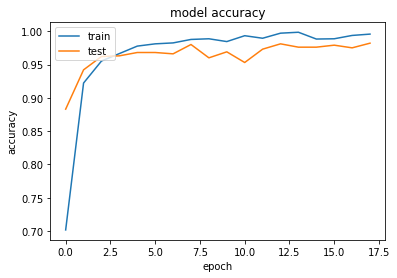

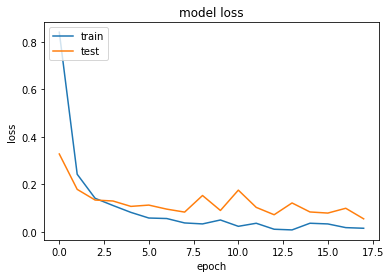

In [ ]:
plt.plot(history.history['sparse_categorical_accuracy'])
plt.plot(history.history['val_sparse_categorical_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [ ]:
loss, accuracy = model.evaluate(X_test, y_test)
print("Test: accuracy = %f  ;  loss = %f" % (accuracy*100, loss*100))

32/32 [==============================] - 0s 5ms/step - loss: 0.0543 - sparse_categorical_accuracy: 0.9820
Test: accuracy = 98.199999  ;  loss = 5.430898


Original Value : 8
Predicted Value : 8


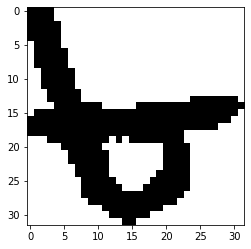

In [ ]:
p=model.predict(X_test[526].reshape(1,32,32,1))
plt.imshow(X_test[526][:,:,0],cmap="gray")
print('Original Value :',y_test[526])
print('Predicted Value :',np.argmax(p))